In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
dataframe = pd.read_csv(r"..\data\listings.csv")

In [12]:
dataframe.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,95.0,63,148,2023-05-25,0.78,1,293,0,First name and Last name: Nicolas Krotz <br/> ...
1,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180.0,6,7,2020-01-04,0.06,1,43,0,03/Z/RA/003410-18
2,14325,Studio Apartment in Prenzlauer Berg,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.54813,13.40366,Entire home/apt,75.0,150,26,2023-11-30,0.15,4,91,0,NaN
3,16644,In the Heart of Berlin - Kreuzberg,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50312,13.43508,Entire home/apt,90.0,93,48,2017-12-14,0.27,2,111,0,NaN
4,17904,Beautiful Kreuzberg studio - 3 months minimum,68997,Matthias,Neukölln,Reuterstraße,52.49419,13.42166,Entire home/apt,28.0,92,299,2022-12-01,1.65,1,29,0,NaN


In [19]:
# Form der Tabelle
#print("Form:", dataframe.shape)

# Spaltennamen und Datentypen
dataframe.info()

# Statistischer Überblick über numerische Spalten
dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13984 entries, 0 to 13983
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13984 non-null  int64  
 1   name                            13984 non-null  object 
 2   host_id                         13984 non-null  int64  
 3   host_name                       13975 non-null  object 
 4   neighbourhood_group             13984 non-null  object 
 5   neighbourhood                   13984 non-null  object 
 6   latitude                        13984 non-null  float64
 7   longitude                       13984 non-null  float64
 8   room_type                       13984 non-null  object 
 9   price                           8990 non-null   float64
 10  minimum_nights                  13984 non-null  int64  
 11  number_of_reviews               13984 non-null  int64  
 12  last_review                     

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.398400e+04,1.398400e+04,13984.000000,13984.000000,8990.000000,13984.000000,13984.000000,10706.000000,13984.000000,13984.000000,13984.000000
mean,4.183053e+17,1.674382e+08,52.508841,13.402642,137.655729,41.564216,40.924128,1.226796,11.924056,139.122068,9.329376
std,5.078403e+17,1.892184e+08,0.033952,0.067546,338.488641,53.848599,93.304429,1.886989,47.859352,139.064635,20.315661
min,3.176000e+03,1.581000e+03,52.340190,13.107580,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.980600e+07,1.575308e+07,52.489600,13.362548,69.000000,2.000000,1.000000,0.130000,1.000000,0.000000,0.000000
50%,4.442411e+07,7.100664e+07,52.509040,13.410657,97.000000,5.000000,7.000000,0.540000,1.000000,89.000000,1.000000
75%,9.512498e+17,2.902724e+08,52.531863,13.438549,149.000000,92.000000,35.000000,1.730000,3.000000,269.000000,10.000000
max,1.315853e+18,6.674071e+08,52.659887,13.721390,9999.000000,1125.000000,2806.000000,50.930000,318.000000,365.000000,602.000000


In [21]:
# Anzahl fehlender Werte pro Spalte
missing = dataframe.isnull().sum()
missing_percent = (missing / len(dataframe)) * 100
missing_df = pd.DataFrame({'Fehlende Werte': missing, '%': missing_percent})
missing_df[missing_df['Fehlende Werte'] > 0].sort_values(by='%', ascending=False)

,Fehlende Werte,%
license,5157,36.877860
price,4994,35.712243
last_review,3278,23.441076
reviews_per_month,3278,23.441076
host_name,9,0.064359


Fehlende Preise: 4994


Text(0.5, 0, 'Preis (€)')

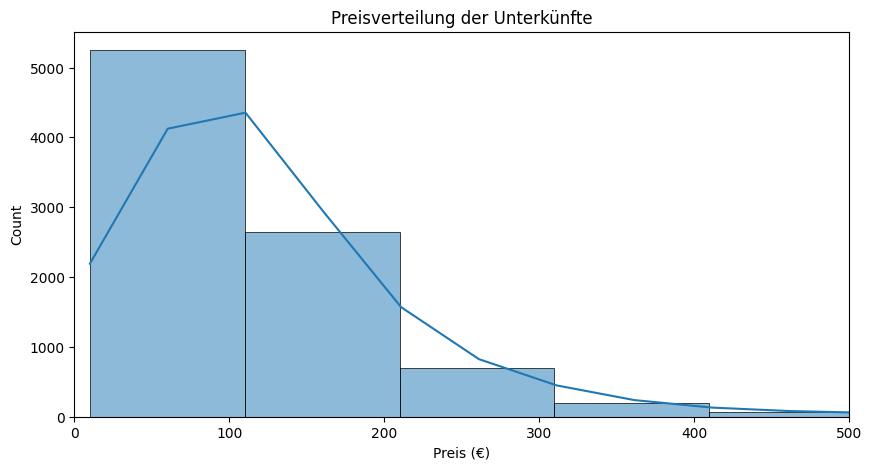

In [33]:
# Anzahl fehlender Preise
print("Fehlende Preise:", dataframe['price'].isnull().sum())


# Preisverteilung visualisieren
plt.figure(figsize=(10, 5))
sns.histplot(dataframe['price'].dropna(), bins=100, kde=True) # KDE = Kernel Density Estimation
plt.xlim(0, 500)  # Begrenzung, um Ausreißer auszublenden
plt.title("Preisverteilung der Unterkünfte")
plt.xlabel("Preis (€)")

Text(0.5, 1.0, 'Boxplot der Preise')

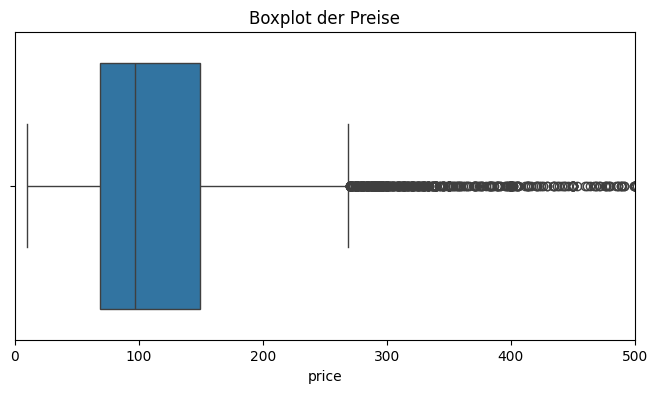

In [34]:
# Boxplot mit Ausreißern
plt.figure(figsize=(8, 4))
sns.boxplot(x=dataframe['price'])
plt.xlim(0, 500)
plt.title("Boxplot der Preise")

In [35]:
# Häufigkeit der Zimmerarten
dataframe['room_type'].value_counts()

# Durchschnittspreis nach Zimmerart
dataframe.groupby('room_type')['price'].mean().sort_values(ascending=False)

# Durchschnittspreis nach Stadtteil (Top 10)
dataframe.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)


neighbourhood
Müggelheim                                   1226.833333
Bohnsdorf                                     596.473684
Biesdorf                                      455.555556
West 5                                        410.454545
Schmöckwitz/Karolinenhof/Rauchfangswerder     356.931034
Blankenfelde/Niederschönhausen                310.478261
Drakestr.                                     299.115385
Rudow                                         284.354167
Prenzlauer Berg Ost                           241.815789
Haselhorst                                    206.111111
Name: price, dtype: float64

In [36]:
# Umwandlung in datetime
dataframe['last_review'] = pd.to_datetime(dataframe['last_review'])

# Zeige Zeitraum der Bewertungen
print("Letzte Bewertung:", dataframe['last_review'].max())
print("Früheste Bewertung:", dataframe['last_review'].min())

Letzte Bewertung: 2024-12-21 00:00:00
Früheste Bewertung: 2012-07-08 00:00:00


Text(0.5, 1.0, 'Korrelationsmatrix')

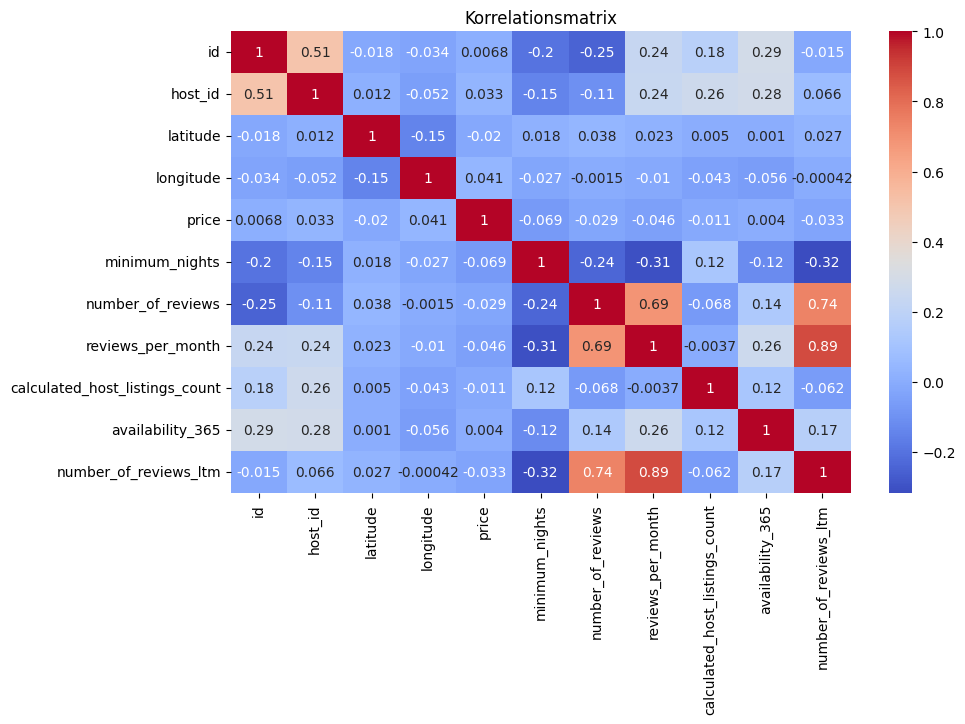

In [37]:
# Korrelation zwischen numerischen Variablen
plt.figure(figsize=(10, 6))
sns.heatmap(dataframe.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Korrelationsmatrix")